# Seattle AirBnb Project
#### by Adalto Correia

This notebook goes over the analysis performed on the dataset for Seattle AirBnb rentals and listings described here: [Seattle AirBnb Open Data](https://www.kaggle.com/airbnb/seattle/data). The work was done as part of the initial project for [Udacity's Data Science NanoDegree](https://www.udacity.com/course/data-scientist-nanodegree--nd025).

### Questions
During this analysis, we try to answer some questions about the AirBnb market in Seattle:
1. What percentage of listings are held by the top owners (people with multiple listings)?
2. How such listings compare to listings of people that have fewer listings in terms of availability throughout the year and average rental cost?
3. What are the peak periods for rent?

#### CRISP-DM - Business Understanding
As an initial hypothesis, we believe that only a few % points are owned by people with more than 10 listings, as the overwhelming majority would be from people that lease their vacation house, or even a separate bedroom on their home on AirBnb. In addition, we would expect that listings from hosts with multiple places for rent would be higher in value, as they would have a more professional take on renting via Airbnb, and be able to place their locations to maximize profits. This would also mean that these listings stay available for most of the year.

Finally, due to the high-tech companies in the area, and snow-filled activities all around, we believe that even in Winter there is no significant change on rates throughout the year.

### Preparation
##### Data download
Please download the data from the link below and publish in a data/ folder to be able to leverage this notebook. [Seattle AirBnb Open Data](https://www.kaggle.com/airbnb/seattle/data)

##### Package Import
We start by importing the required packages for this notebook.

In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
%matplotlib inline


##### CRISP-DM - Data Understanding

We start by importing the required packages for this notebook.
Let's get some data in here and take a peak on what we have to work with.

In [2]:
# Listings
listings_df = pd.read_csv('./data/listings.csv')
listings_df.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,2,1.15
3,7421966,https://www.airbnb.com/rooms/7421966,20160104002432,2016-01-04,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,...,NaN,f,NaN,WASHINGTON,f,flexible,f,f,1,NaN
4,278830,https://www.airbnb.com/rooms/278830,20160104002432,2016-01-04,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,...,9.0,f,NaN,WASHINGTON,f,strict,f,f,1,0.89


In [3]:
# Calendar
calendar_df = pd.read_csv('./data/calendar.csv')
calendar_df.head()


,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN


Note: that price value with currency may become a problem later. Let's change all values to numeric value.

In [7]:
# Reviews
reviews_df = pd.read_csv('./data/reviews.csv')
reviews_df.head()


,listing_id,id,date,reviewer_id,reviewer_name,comments
0,7202016,38917982,2015-07-19,28943674,Bianca,Cute and cozy place. Perfect location to every...
1,7202016,39087409,2015-07-20,32440555,Frank,Kelly has a great room in a very central locat...
2,7202016,39820030,2015-07-26,37722850,Ian,"Very spacious apartment, and in a great neighb..."
3,7202016,40813543,2015-08-02,33671805,George,Close to Seattle Center and all it has to offe...
4,7202016,41986501,2015-08-10,34959538,Ming,Kelly was a great host and very accommodating ...


In [8]:
# Sizes
print(f'Listings shape: {listings_df.shape}')
print(f'Calendar shape: {calendar_df.shape}')
print(f'Reviews shape: {reviews_df.shape}')

Listings shape: (3818, 92)
Calendar shape: (1393570, 4)
Reviews shape: (84849, 6)


#### CRISP-DM - Prepare Data

Now it is time to fix the few items mapped before, relating to prices with $ on the front and NaNs.

In [4]:
# In order to prepare price data for analysis, we created the following function to
# convert the string values to float
def currency_to_float(dataframe, column):
    """
    Function to convert currency columns to float
    """
    dataframe[column] = dataframe[column].replace('[\$,]', '', regex=True).astype(float)
    return dataframe

In [5]:
# Correct price column from currency to numeric format
calendar_df = currency_to_float(calendar_df, 'price')
calendar_df.price.head()

0    85.0
1    85.0
2     NaN
3     NaN
4     NaN
Name: price, dtype: float64

As we will work with the price and averages, we need to drop the NaNs on the calendar_df.

In [7]:
# Same cleanup for Listings
listings_df = currency_to_float(listings_df, 'price')
listings_df.price.head()

0     85.0
1    150.0
2    975.0
3    100.0
4    450.0
Name: price, dtype: float64

In [8]:
# Let's check how many nulls on Listings

sum_nulls = listings_df.isnull().sum().sort_values(ascending=True)
print(sum_nulls[sum_nulls == 0].shape[0])
sum_nulls[sum_nulls == 0]

47


id                                  0
price                               0
amenities                           0
bed_type                            0
accommodates                        0
room_type                           0
is_location_exact                   0
guests_included                     0
longitude                           0
country                             0
country_code                        0
smart_location                      0
market                              0
state                               0
city                                0
calculated_host_listings_count      0
neighbourhood_group_cleansed        0
extra_people                        0
maximum_nights                      0
require_guest_phone_verification    0
require_guest_profile_picture       0
cancellation_policy                 0
instant_bookable                    0
jurisdiction_names                  0
requires_license                    0
minimum_nights                      0
number_of_re

We find that 47 columns have no nulls. Some of them as price, host_id, calculated_host_listings_count, id will allow us to answer some of our original questions. 
Just to make sure, let's confirm for the next section that we don't have strange things as price or calculated_host_listings_count == 0 which would not make sense.

We also noticed before that the calendar_df dataframe had some NaN values for price, on the dates where the listing was not available, let's drop these as they will not help on our analysis and averages.

In [9]:
calendar_df = calendar_df.dropna(subset=['price'])

In [11]:
# Making sure that there are no 0 
print(f'Priced as zero: {listings_df[listings_df.price == 0].shape[0]}')
print(f'Listing count as zero: {listings_df[listings_df.calculated_host_listings_count == 0].shape[0]}')

Priced as zero: 0
Listing count as zero: 0


#### CRISP-DM - Data Modeling 

For some of our questions we will need to group the host ids in categories based on the number of listings they have on Airbnb. 

In [20]:
# Bucket bins by listing count per host 
bins = np.linspace(listings_df.calculated_host_listings_count.min(), listings_df.calculated_host_listings_count.max(), 10)
listing_count = listings_df.groupby(pd.cut(listings_df.calculated_host_listings_count, bins))


We will also need a function to work on cleaning data after the groupings

In [24]:
def clean_series_for_chart(series):
    """Function to remove entries with 0 in order to present them correctly in bar charts"""
    
    return series[series != 0].dropna()
    

Great! We can now move on to answering some of our questions.

#### CRISP-DM - Evaluating Results

##### Question 1

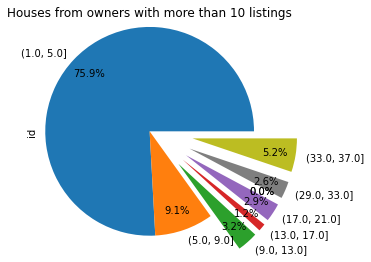

In [12]:
# Chart with distribution of listings according to category created for hosts
listings_pie_chart = group_by_listing_count.id.count().plot(kind='pie', explode=[0,0,.5,.5,.5,.5,.5,.5,.5], pctdistance=.8, autopct='%.1f%%', radius=1.2, title='Houses from owners with more than 10 listings')


From the chart, it seems that around 86% of all listings are from hosts with 9 or less listings in Seattle.  

##### Question 2

<AxesSubplot:title={'center':'Analysis of average $ according to number of listing per host'}, xlabel='calculated_host_listings_count'>

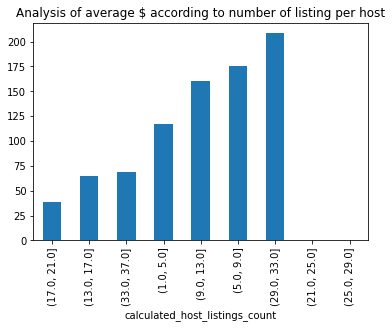

In [13]:
# Plot average rent prices grouped by number of listings per host
group_by_listing_count.mean().price.sort_values().plot(kind='bar', title='Analysis of average $ according to number of listing per host')

The null values are impacting on our chart, let's see if we can do better

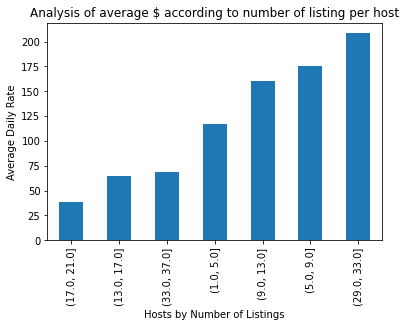

In [25]:
# Plot average rent prices grouped by number of listings per host - No 0
grouped_mean_values = group_by_listing_count.mean().price.sort_values()

# Clean data before plot
grouped_mean_values = clean_series_for_chart(grouped_mean_values)

_ = grouped_mean_values.plot(kind='bar', ylabel = 'Average Daily Rate', xlabel = 'Hosts by Number of Listings', title='Analysis of average $ according to number of listing per host')


From this, there's not a direct correlation between the number of listings a host has and the average price of the properties. Although the top average price was for the bin of listings from hosts that have between 29-33, the average value for the bin of hosts with even more listings(33-37) is lower.

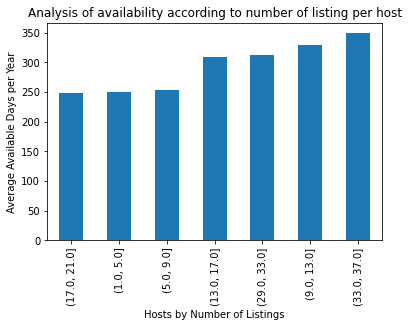

In [26]:
# Plot average rent prices grouped by number of listings per host
grouped_availability = group_by_listing_count.mean().availability_365.sort_values()

# Clean data before plot
grouped_availability = clean_series_for_chart(grouped_availability)

# Now we can  plot
_ = grouped_availability.plot(kind='bar', ylabel = 'Average Available Days per Year', xlabel = 'Hosts by Number of Listings', title='Analysis of availability according to number of listing per host')


This looks similar to our initial hypothesis, where indeed listings for rent owned by hosts with multiple properties are kept as available in the Airbnb platform for longer.

##### Question 3

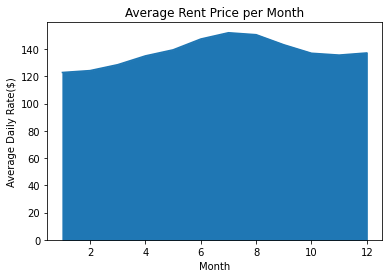

In [27]:
# Let's group the calendar_df information by month to understand availability of listings
grouped_by_month = calendar_df.copy()
grouped_by_month.date = pd.to_datetime(grouped_by_month.date)
grouped_by_month.date = grouped_by_month.date.dt.month

# Now let's get the mean price in each month and plot
grouped_df = grouped_by_month.price.groupby(grouped_by_month.date).mean()
_ = grouped_df.plot(kind='area', xlabel = 'Month', ylabel='Average Daily Rate($)', title='Average Rent Price per Month')

Our hypothesis again here was not completely correct. There is a clear peak in average rent cost during the Summer months. Nevertheless, the standard deviation of rent cost during the year is only of $9.52 per day, which represents only 6.26% of the cost for the top month (July).